In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv('Calories_Burnt.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         15000 non-null  int64  
 1   age             14982 non-null  float64
 2   gender          15000 non-null  object 
 3   bmi             14980 non-null  float64
 4   active_hours    14976 non-null  float64
 5   workout_hours   14978 non-null  float64
 6   workout_type    8332 non-null   object 
 7   calories_burnt  15000 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 937.6+ KB


In [3]:
df.head()

,user_id,age,gender,bmi,active_hours,workout_hours,workout_type,calories_burnt
0,1,20.0,Female,30.368669,5.254338,1.219884,Mixed,1573.097315
1,2,46.0,Male,31.475678,5.584941,3.308829,Strength,2035.016593
2,3,32.0,Male,21.554478,10.561181,0.000000,NaN,1771.662910
3,4,56.0,Male,27.443454,10.038466,1.593872,Cardio,2097.055515
4,5,28.0,Male,27.831313,6.652297,0.000000,NaN,1443.542811


In [4]:
# Descriptive Statistics
df.describe()

,user_id,age,bmi,active_hours,workout_hours,calories_burnt
count,15000.000000,14982.000000,14980.000000,14976.000000,14978.000000,15000.000000
mean,7500.500000,41.177346,25.027650,7.939675,1.111525,1716.767677
std,4330.271354,13.537454,3.999768,2.219373,1.092277,294.078878
min,1.000000,18.000000,7.981409,-11.919711,-3.560022,581.639388
25%,3750.750000,29.000000,22.335430,6.626565,0.000000,1505.914111
50%,7500.500000,41.000000,25.046474,7.974012,1.053870,1695.842207
75%,11250.250000,53.000000,27.737444,9.364653,1.922138,1909.039725
max,15000.000000,64.000000,39.272395,16.252740,5.465399,2909.961695


## EDA

In [5]:
# Checking for Missing Values
df.isnull().sum()

user_id              0
age                 18
gender               0
bmi                 20
active_hours        24
workout_hours       22
workout_type      6668
calories_burnt       0
dtype: int64

In [6]:
df['workout_type'].fillna('No Workout', inplace=True)

In [7]:
df.loc[df['workout_type'] == 'No Workout', 'workout_hours'] = 0

In [8]:
df.isnull().sum()

user_id            0
age               18
gender             0
bmi               20
active_hours      24
workout_hours      7
workout_type       0
calories_burnt     0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

user_id           0
age               0
gender            0
bmi               0
active_hours      0
workout_hours     0
workout_type      0
calories_burnt    0
dtype: int64

In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [12]:
#Outliers Detection
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
outliers.sum()

user_id             0
age                 0
bmi                98
active_hours      145
workout_hours      46
calories_burnt    106
dtype: int64

In [13]:
#Removing Outliers
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
#Handling Negative Values
df['active_hours'] = df['active_hours'].apply(lambda x: abs(x) if x < 0 else x)
df['workout_hours'] = df['workout_hours'].apply(lambda x: abs(x) if x < 0 else x)

In [15]:
df.describe()

,user_id,age,bmi,active_hours,workout_hours,calories_burnt
count,14580.000000,14580.000000,14580.000000,14580.000000,14580.000000,14580.000000
mean,7515.213306,41.178875,25.022892,7.984997,0.847549,1711.590618
std,4332.002723,13.528283,3.890904,1.932453,1.002306,281.839789
min,1.000000,18.000000,14.247276,2.566239,0.000000,918.986472
25%,3768.750000,29.000000,22.357133,6.649281,0.000000,1505.847299
50%,7519.500000,41.000000,25.032626,7.972246,0.351103,1692.923640
75%,11271.250000,53.000000,27.707906,9.340527,1.609792,1902.518633
max,15000.000000,64.000000,35.826093,13.409635,4.042614,2512.746100


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

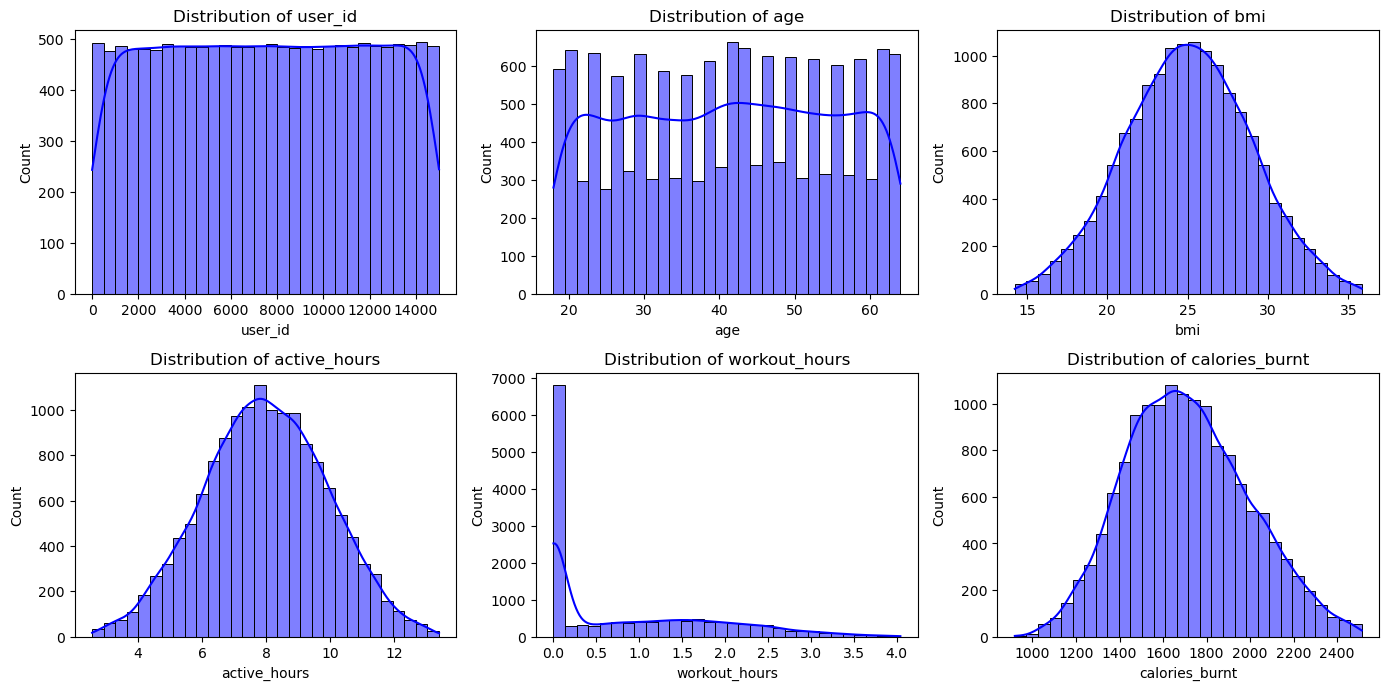

In [16]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [17]:
df.drop(columns=['user_id'],inplace=True)

In [21]:
df1 = df[df['workout_type'] == 'No Workout'].copy()
df1.drop(columns=['workout_type', 'workout_hours'], inplace=True)

df2 = df[df['workout_type'] != 'No Workout'].copy()

In [22]:
df1.head()

,age,gender,bmi,active_hours,calories_burnt
2,32.0,Male,21.554478,10.561181,1771.662910
4,28.0,Male,27.831313,6.652297,1443.542811
5,53.0,Female,20.383768,8.045772,1508.414868
7,44.0,Female,27.609000,7.433182,1519.408172
8,22.0,Female,20.976593,6.663804,1376.146288


In [23]:
df2.head()

,age,gender,bmi,active_hours,workout_hours,workout_type,calories_burnt
0,20.0,Female,30.368669,5.254338,1.219884,Mixed,1573.097315
1,46.0,Male,31.475678,5.584941,3.308829,Strength,2035.016593
3,56.0,Male,27.443454,10.038466,1.593872,Cardio,2097.055515
6,34.0,Male,28.432988,6.399045,1.925613,Mixed,1809.356934
10,38.0,Male,27.375486,8.437266,2.008997,Cardio,2019.280757


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
def visualize_distributions(df, title):
    continuous_features = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(continuous_features, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[feature].dropna(), kde=True)
        plt.title(f'Distribution of {feature}')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

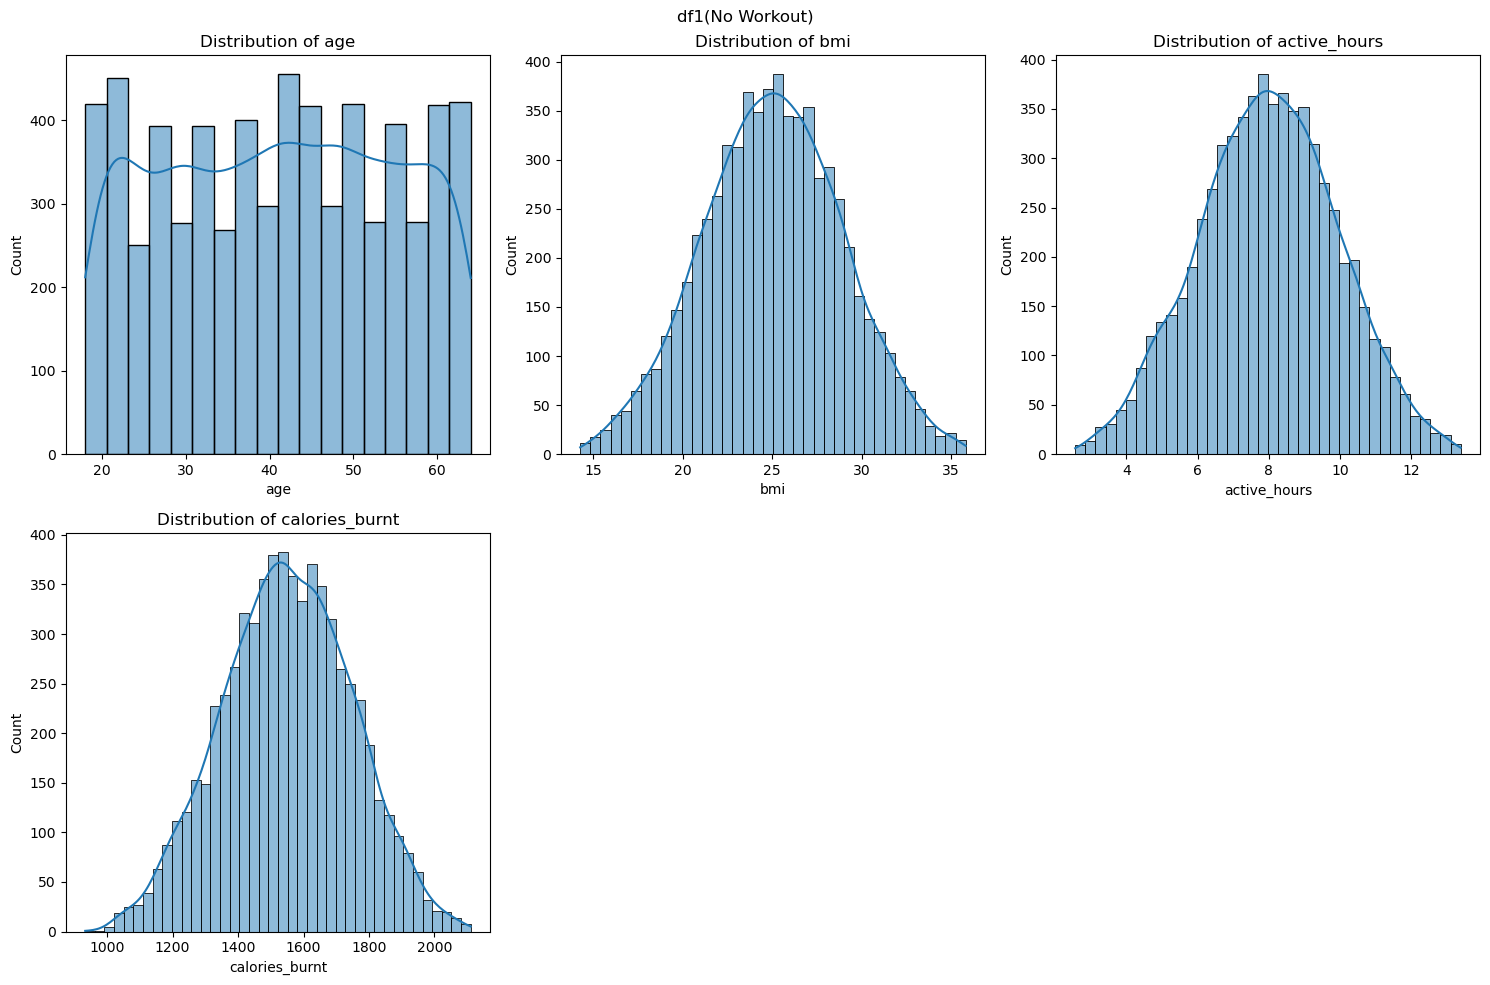

In [26]:
visualize_distributions(df1, 'df1(No Workout)')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

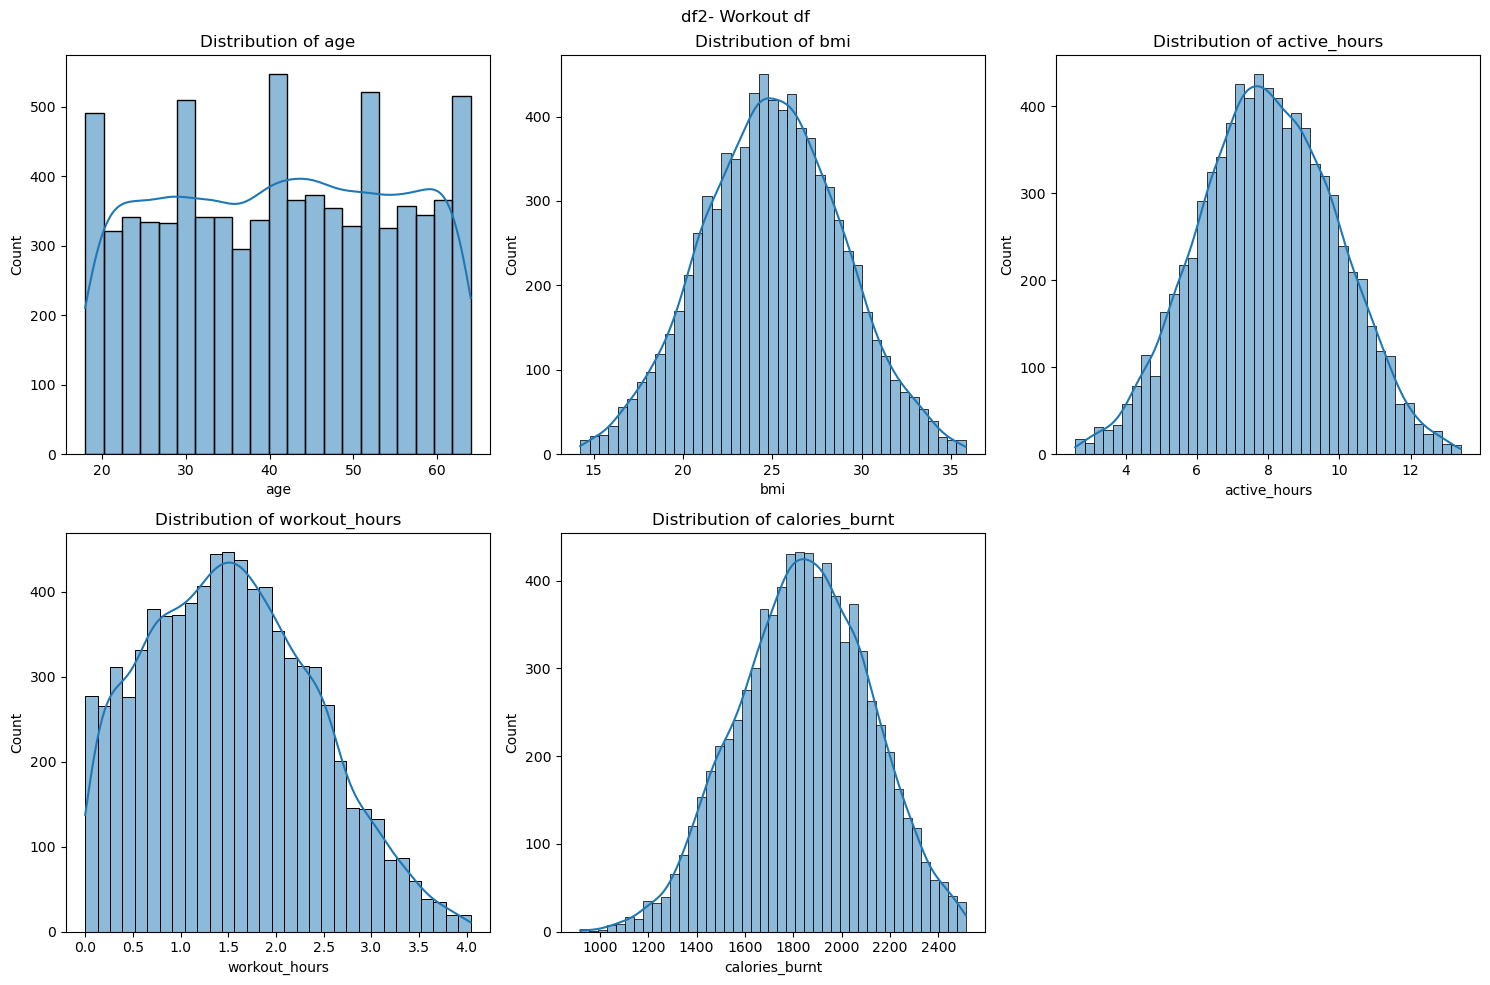

In [27]:
visualize_distributions(df2, 'df2- Workout df')

In [29]:
zero_workout_hours_records = df2[df2['workout_hours'] == 0]
zero_workout_hours_records

,age,gender,bmi,active_hours,workout_hours,workout_type,calories_burnt


In [30]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
def custom_label_encoder(column):
    le = LabelEncoder()
    encoded = le.fit_transform(column)
    return encoded

df1['gender'] = custom_label_encoder(df1['gender'])

df2['gender'] = custom_label_encoder(df2['gender'])
df2['workout_type'] = custom_label_encoder(df2['workout_type'])

In [31]:
df1.head()

,age,gender,bmi,active_hours,calories_burnt
2,32.0,1,21.554478,10.561181,1771.662910
4,28.0,1,27.831313,6.652297,1443.542811
5,53.0,0,20.383768,8.045772,1508.414868
7,44.0,0,27.609000,7.433182,1519.408172
8,22.0,0,20.976593,6.663804,1376.146288


In [32]:
df2.head()

,age,gender,bmi,active_hours,workout_hours,workout_type,calories_burnt
0,20.0,0,30.368669,5.254338,1.219884,1,1573.097315
1,46.0,1,31.475678,5.584941,3.308829,2,2035.016593
3,56.0,1,27.443454,10.038466,1.593872,0,2097.055515
6,34.0,1,28.432988,6.399045,1.925613,1,1809.356934
10,38.0,1,27.375486,8.437266,2.008997,0,2019.280757


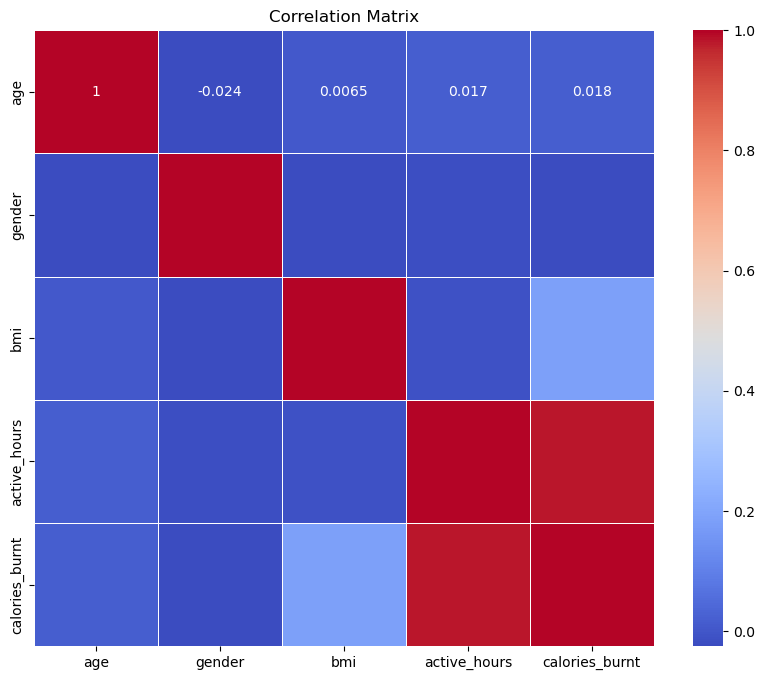

In [33]:
corr_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

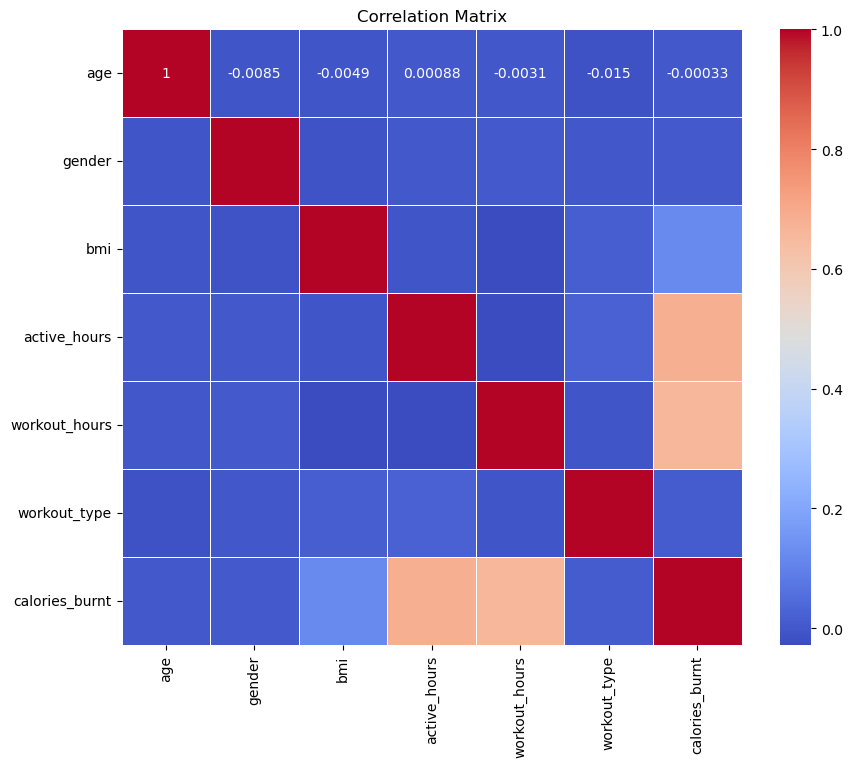

In [34]:
corr_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


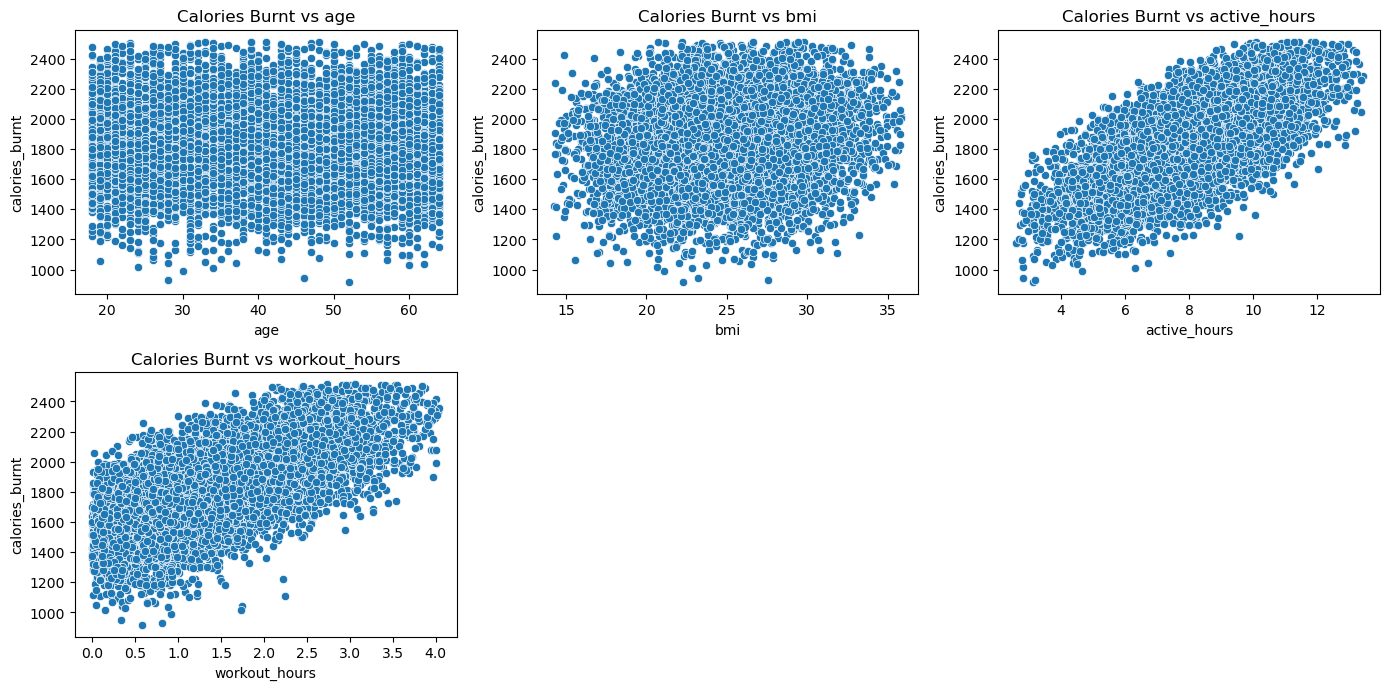

In [39]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns[1:-1], 1): 
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df2[column], y=df2['calories_burnt'])
    plt.title(f'Calories Burnt vs {column}')

plt.tight_layout()
plt.show()

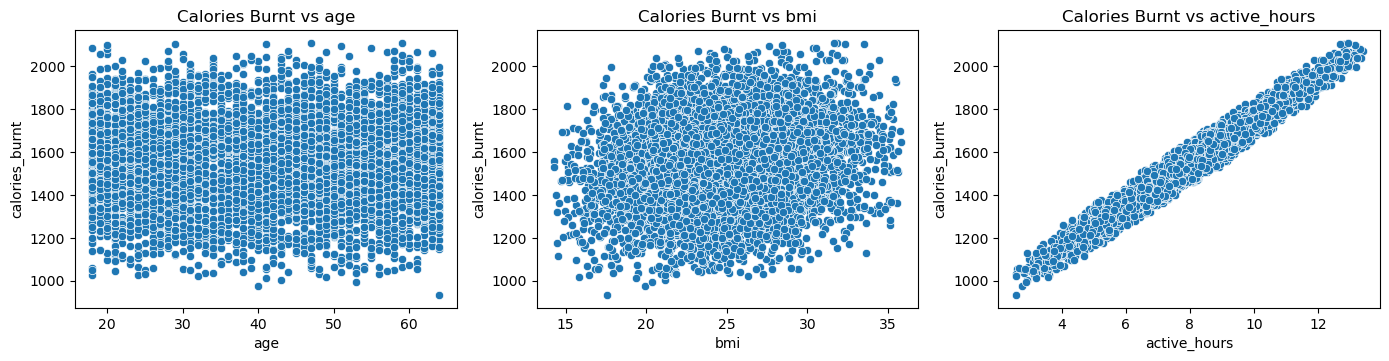

In [42]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns[1:-2], 1): 
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df1[column], y=df1['calories_burnt'])
    plt.title(f'Calories Burnt vs {column}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Workout Type Distribution')

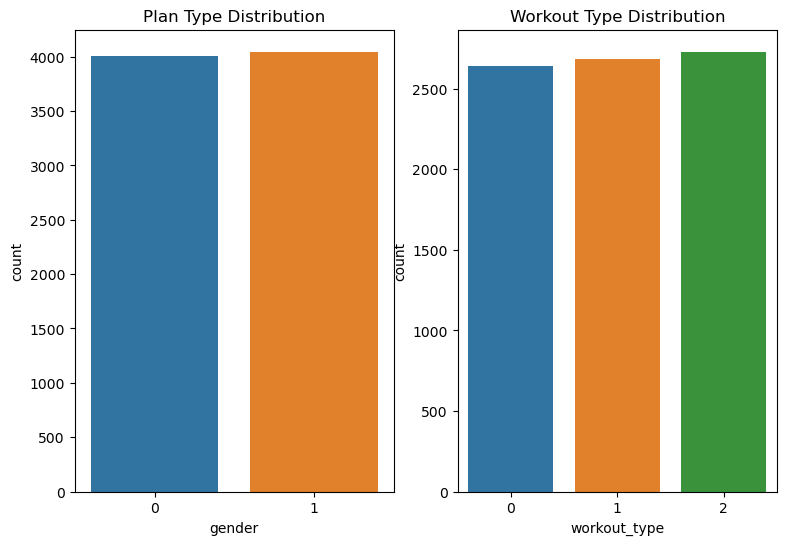

In [46]:
plt.figure(figsize=(14, 6))

# Gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=df2)
plt.title('Plan Type Distribution')

# Workout type distribution
plt.subplot(1, 3, 2)
sns.countplot(x='workout_type', data=df2)
plt.title('Workout Type Distribution')

Text(0.5, 1.0, 'Plan Type Distribution')

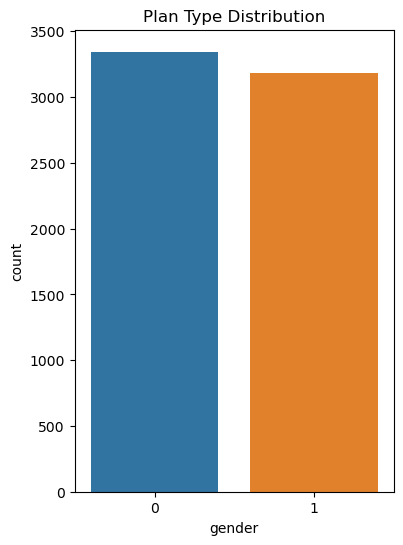

In [45]:
plt.figure(figsize=(14, 6))

# Gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=df1)
plt.title('Plan Type Distribution')

## Model Building

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [63]:
def fit_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"{model.__class__.__name__} - Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    return test_r2

In [60]:
def fit_and_get_scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return train_r2, test_r2, train_mse, test_mse

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
X1 = df1.drop(columns=['calories_burnt']) 
y1 = df1['calories_burnt']  

In [51]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [53]:
linear_model = LinearRegression()
fit_and_evaluate_model(linear_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)

LinearRegression - Train R²: 1.0000, Test R²: 1.0000
Train MSE: 0.0000, Test MSE: 0.0000


1.0

In [54]:
ridge_model = Ridge(alpha=1.0)
fit_and_evaluate_model(ridge_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)

Ridge - Train R²: 1.0000, Test R²: 1.0000
Train MSE: 0.0014, Test MSE: 0.0015


0.9999999629355405

In [55]:
lasso_model = Lasso(alpha=0.1)
fit_and_evaluate_model(lasso_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)

Lasso - Train R²: 1.0000, Test R²: 1.0000
Train MSE: 0.0202, Test MSE: 0.0208


0.9999994867308255

In [56]:
dt_model = DecisionTreeRegressor(random_state=42)
fit_and_evaluate_model(dt_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)

DecisionTreeRegressor - Train R²: 1.0000, Test R²: 0.9986
Train MSE: 0.0000, Test MSE: 55.4250


0.9986329694401128

In [57]:
rf_model = RandomForestRegressor(random_state=42)
fit_and_evaluate_model(rf_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)

RandomForestRegressor - Train R²: 0.9999, Test R²: 0.9995
Train MSE: 2.2446, Test MSE: 18.4242


0.9995455752748106

In [58]:
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
fit_and_evaluate_model(svm_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)

SVR - Train R²: 0.8748, Test R²: 0.8657
Train MSE: 4877.5740, Test MSE: 5445.8993


0.8656796695835757

In [59]:
xgb_model = XGBRegressor(random_state=42)
fit_and_evaluate_model(xgb_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)

XGBRegressor - Train R²: 0.9999, Test R²: 0.9993
Train MSE: 4.3204, Test MSE: 28.2573


0.9993030485740179

In [61]:
model_performance_results = []

# Linear Regression
linear_model = LinearRegression()
lr_train_r2, lr_test_r2, lr_train_mse, lr_test_mse = fit_and_get_scores(linear_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)
model_performance_results.append({
    'Model': 'Linear Regression', 'Train R²': lr_train_r2, 'Test R²': lr_test_r2, 
    'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse
})

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_train_r2, ridge_test_r2, ridge_train_mse, ridge_test_mse = fit_and_get_scores(ridge_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)
model_performance_results.append({
    'Model': 'Ridge Regression', 'Train R²': ridge_train_r2, 'Test R²': ridge_test_r2, 
    'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse
})

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_train_r2, lasso_test_r2, lasso_train_mse, lasso_test_mse = fit_and_get_scores(lasso_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)
model_performance_results.append({
    'Model': 'Lasso Regression', 'Train R²': lasso_train_r2, 'Test R²': lasso_test_r2, 
    'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse
})

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_train_r2, dt_test_r2, dt_train_mse, dt_test_mse = fit_and_get_scores(dt_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)
model_performance_results.append({
    'Model': 'Decision Tree', 'Train R²': dt_train_r2, 'Test R²': dt_test_r2, 
    'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse
})

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_train_r2, rf_test_r2, rf_train_mse, rf_test_mse = fit_and_get_scores(rf_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)
model_performance_results.append({
    'Model': 'Random Forest', 'Train R²': rf_train_r2, 'Test R²': rf_test_r2, 
    'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse
})


# SVM
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_train_r2, svm_test_r2, svm_train_mse, svm_test_mse = fit_and_get_scores(svm_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)
model_performance_results.append({
    'Model': 'SVM', 'Train R²': svm_train_r2, 'Test R²': svm_test_r2, 
    'Train MSE': svm_train_mse, 'Test MSE': svm_test_mse
})

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_train_r2, xgb_test_r2, xgb_train_mse, xgb_test_mse = fit_and_get_scores(xgb_model, X1_train_scaled, X1_test_scaled, y1_train, y1_test)
model_performance_results.append({
    'Model': 'XGBoost', 'Train R²': xgb_train_r2, 'Test R²': xgb_test_r2, 
    'Train MSE': xgb_train_mse, 'Test MSE': xgb_test_mse
})

In [62]:
performance_df = pd.DataFrame(model_performance_results)
print(performance_df)


               Model  Train R²   Test R²     Train MSE      Test MSE
0  Linear Regression  1.000000  1.000000  1.244571e-25  1.355015e-25
1   Ridge Regression  1.000000  1.000000  1.439046e-03  1.502746e-03
2   Lasso Regression  0.999999  0.999999  2.018436e-02  2.081005e-02
3      Decision Tree  1.000000  0.998633  0.000000e+00  5.542505e+01
4      Random Forest  0.999942  0.999546  2.244562e+00  1.842425e+01
5                SVM  0.874814  0.865680  4.877574e+03  5.445899e+03
6            XGBoost  0.999889  0.999303  4.320370e+00  2.825728e+01


In [64]:
#Random Forest comparitevely generalised model for df1

In [66]:
# Model check for df2
X2 = df2.drop(columns=['calories_burnt']) 
y2 = df2['calories_burnt']  

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [67]:

model_performance_results_df2 = []

#Linear Regression
linear_model = LinearRegression()
lr_train_r2_df2, lr_test_r2_df2, lr_train_mse_df2, lr_test_mse_df2 = fit_and_get_scores(linear_model, X2_train_scaled, X2_test_scaled, y2_train, y2_test)
model_performance_results_df2.append({
    'Model': 'Linear Regression', 'Train R²': lr_train_r2_df2, 'Test R²': lr_test_r2_df2, 
    'Train MSE': lr_train_mse_df2, 'Test MSE': lr_test_mse_df2
})

#Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_train_r2_df2, ridge_test_r2_df2, ridge_train_mse_df2, ridge_test_mse_df2 = fit_and_get_scores(ridge_model, X2_train_scaled, X2_test_scaled, y2_train, y2_test)
model_performance_results_df2.append({
    'Model': 'Ridge Regression', 'Train R²': ridge_train_r2_df2, 'Test R²': ridge_test_r2_df2, 
    'Train MSE': ridge_train_mse_df2, 'Test MSE': ridge_test_mse_df2
})

#Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_train_r2_df2, lasso_test_r2_df2, lasso_train_mse_df2, lasso_test_mse_df2 = fit_and_get_scores(lasso_model, X2_train_scaled, X2_test_scaled, y2_train, y2_test)
model_performance_results_df2.append({
    'Model': 'Lasso Regression', 'Train R²': lasso_train_r2_df2, 'Test R²': lasso_test_r2_df2, 
    'Train MSE': lasso_train_mse_df2, 'Test MSE': lasso_test_mse_df2
})

#Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_train_r2_df2, dt_test_r2_df2, dt_train_mse_df2, dt_test_mse_df2 = fit_and_get_scores(dt_model, X2_train_scaled, X2_test_scaled, y2_train, y2_test)
model_performance_results_df2.append({
    'Model': 'Decision Tree', 'Train R²': dt_train_r2_df2, 'Test R²': dt_test_r2_df2, 
    'Train MSE': dt_train_mse_df2, 'Test MSE': dt_test_mse_df2
})

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_train_r2_df2, rf_test_r2_df2, rf_train_mse_df2, rf_test_mse_df2 = fit_and_get_scores(rf_model, X2_train_scaled, X2_test_scaled, y2_train, y2_test)
model_performance_results_df2.append({
    'Model': 'Random Forest', 'Train R²': rf_train_r2_df2, 'Test R²': rf_test_r2_df2, 
    'Train MSE': rf_train_mse_df2, 'Test MSE': rf_test_mse_df2
})


#SVM
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_train_r2_df2, svm_test_r2_df2, svm_train_mse_df2, svm_test_mse_df2 = fit_and_get_scores(svm_model, X2_train_scaled, X2_test_scaled, y2_train, y2_test)
model_performance_results_df2.append({
    'Model': 'SVM', 'Train R²': svm_train_r2_df2, 'Test R²': svm_test_r2_df2, 
    'Train MSE': svm_train_mse_df2, 'Test MSE': svm_test_mse_df2
})

#XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_train_r2_df2, xgb_test_r2_df2, xgb_train_mse_df2, xgb_test_mse_df2 = fit_and_get_scores(xgb_model, X2_train_scaled, X2_test_scaled, y2_train, y2_test)
model_performance_results_df2.append({
    'Model': 'XGBoost', 'Train R²': xgb_train_r2_df2, 'Test R²': xgb_test_r2_df2, 
    'Train MSE': xgb_train_mse_df2, 'Test MSE': xgb_test_mse_df2
})

In [68]:
performance_df2 = pd.DataFrame(model_performance_results_df2)
print(performance_df2)

               Model  Train R²   Test R²     Train MSE      Test MSE
0  Linear Regression  0.951767  0.962240   3540.289204   2755.118867
1   Ridge Regression  0.951767  0.962242   3540.291016   2754.970646
2   Lasso Regression  0.951767  0.962258   3540.350559   2753.821211
3      Decision Tree  1.000000  0.884046      0.000000   8460.406636
4      Random Forest  0.991971  0.953581    589.342900   3386.910703
5                SVM  0.803914  0.817960  14392.769176  13282.269675
6            XGBoost  0.990634  0.946397    687.500603   3911.055226


In [69]:
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [10, 20,30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [71]:
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_rf_train_r2_df2, grid_rf_test_r2_df2, grid_rf_train_mse_df2, grid_rf_test_mse_df2 = fit_and_get_scores(grid_rf, X2_train_scaled, X2_test_scaled, y2_train, y2_test)
print(f'Train R² : {grid_rf_train_r2_df2}, Test R²: {grid_rf_test_r2_df2}, Train MSE: {grid_rf_train_mse_df2}, Test MSE: {grid_rf_test_mse_df2}')

Train R² : 0.9815402345652937, Test R²: 0.9558351963303081, Train MSE: 1354.9535830914558, Test MSE: 3222.4186097511933


In [72]:
from sklearn.pipeline import Pipeline
import pickle

In [76]:

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', RandomForestRegressor(random_state=42))  
])

pipeline_rf.fit(X1_train, y1_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [74]:
with open('C:\\Users\\hp\\Desktop\\CalorieTracker\\noworkout.pkl', 'wb') as f:
    pickle.dump(pipeline_rf, f)

In [75]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', Lasso(alpha=0.1))  
])

pipeline_lasso.fit(X2_train, y2_train)


Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.1))])

In [78]:
with open('C:\\Users\\hp\\Desktop\\CalorieTracker\\workout.pkl', 'wb') as f:
    pickle.dump(pipeline_lasso, f)

In [79]:
df1.head()

,age,gender,bmi,active_hours,calories_burnt
2,32.0,1,21.554478,10.561181,1771.662910
4,28.0,1,27.831313,6.652297,1443.542811
5,53.0,0,20.383768,8.045772,1508.414868
7,44.0,0,27.609000,7.433182,1519.408172
8,22.0,0,20.976593,6.663804,1376.146288


In [80]:
df2.head()

,age,gender,bmi,active_hours,workout_hours,workout_type,calories_burnt
0,20.0,0,30.368669,5.254338,1.219884,1,1573.097315
1,46.0,1,31.475678,5.584941,3.308829,2,2035.016593
3,56.0,1,27.443454,10.038466,1.593872,0,2097.055515
6,34.0,1,28.432988,6.399045,1.925613,1,1809.356934
10,38.0,1,27.375486,8.437266,2.008997,0,2019.280757


In [85]:
with open('noworkout.pkl', 'rb') as f:
    noworkout_model = pickle.load(f)
    
with open('workout.pkl', 'rb') as f:
    workout_model = pickle.load(f)


input_data_df1 = np.array([[23, 1, 23.9, 5]])  # Age, Male, BMI, Active hours


input_data_df2 = np.array([[23, 1, 23.9, 5, 2, 2]])   # Age, Male, BMI, Active hours, Workout time, Workoutime type - Strength

# Predictions
noworkout_prediction = noworkout_model.predict(input_data_df1)
workout_prediction = workout_model.predict(input_data_df2)

print(f"Predicted Calories Burnt (No Workout): {noworkout_prediction[0]:.2f}")
print(f"Predicted Calories Burnt (With Workout): {workout_prediction[0]:.2f}")

Predicted Calories Burnt (No Workout): 1239.88
Predicted Calories Burnt (With Workout): 1634.15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
